In [44]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import umap

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.manifold import TSNE
import umap

warnings.filterwarnings("ignore")
%matplotlib inline

# EDA

In [7]:
#получение данных из источника, проверка и переименование полей, исключение заведомо бесполезных для моделирования

data = pd.read_csv('/home/dataengineer/OTUS_ML/data/creditcard.csv')
data = data[data.index < 80000]

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80000 non-null  float64
 1   V1      80000 non-null  float64
 2   V2      80000 non-null  float64
 3   V3      80000 non-null  float64
 4   V4      80000 non-null  float64
 5   V5      80000 non-null  float64
 6   V6      80000 non-null  float64
 7   V7      80000 non-null  float64
 8   V8      80000 non-null  float64
 9   V9      80000 non-null  float64
 10  V10     80000 non-null  float64
 11  V11     80000 non-null  float64
 12  V12     80000 non-null  float64
 13  V13     80000 non-null  float64
 14  V14     80000 non-null  float64
 15  V15     80000 non-null  float64
 16  V16     80000 non-null  float64
 17  V17     80000 non-null  float64
 18  V18     80000 non-null  float64
 19  V19     80000 non-null  float64
 20  V20     80000 non-null  float64
 21  V21     80000 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#получение базовых статистик

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,37332.183588,-0.258086,-0.036364,0.678340,0.163600,-0.276254,0.095376,-0.114390,0.053252,-0.010000,...,-0.029000,-0.105751,-0.037651,0.007894,0.134427,0.026336,0.002025,0.002570,97.775498,0.002450
std,15209.718131,1.888947,1.679465,1.386402,1.368678,1.382928,1.305057,1.247498,1.233289,1.144390,...,0.739825,0.636423,0.628525,0.595679,0.440853,0.498120,0.390666,0.331055,269.180362,0.049437
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,30718.500000,-1.019388,-0.599350,0.186697,-0.725926,-0.894690,-0.642417,-0.604450,-0.141200,-0.686546,...,-0.224356,-0.524838,-0.178315,-0.322913,-0.129354,-0.326741,-0.063341,-0.005819,7.680000,0.000000
50%,40052.000000,-0.250144,0.069013,0.765189,0.182134,-0.309687,-0.153999,-0.073816,0.069079,-0.089189,...,-0.058577,-0.080453,-0.050284,0.064108,0.172777,-0.072778,0.009277,0.022868,26.955000,0.000000
75%,49105.000000,1.153620,0.721751,1.394244,1.043840,0.258717,0.490107,0.416536,0.349036,0.624249,...,0.117690,0.309546,0.080590,0.405444,0.421519,0.307898,0.082446,0.076056,89.205000,0.000000
max,58287.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


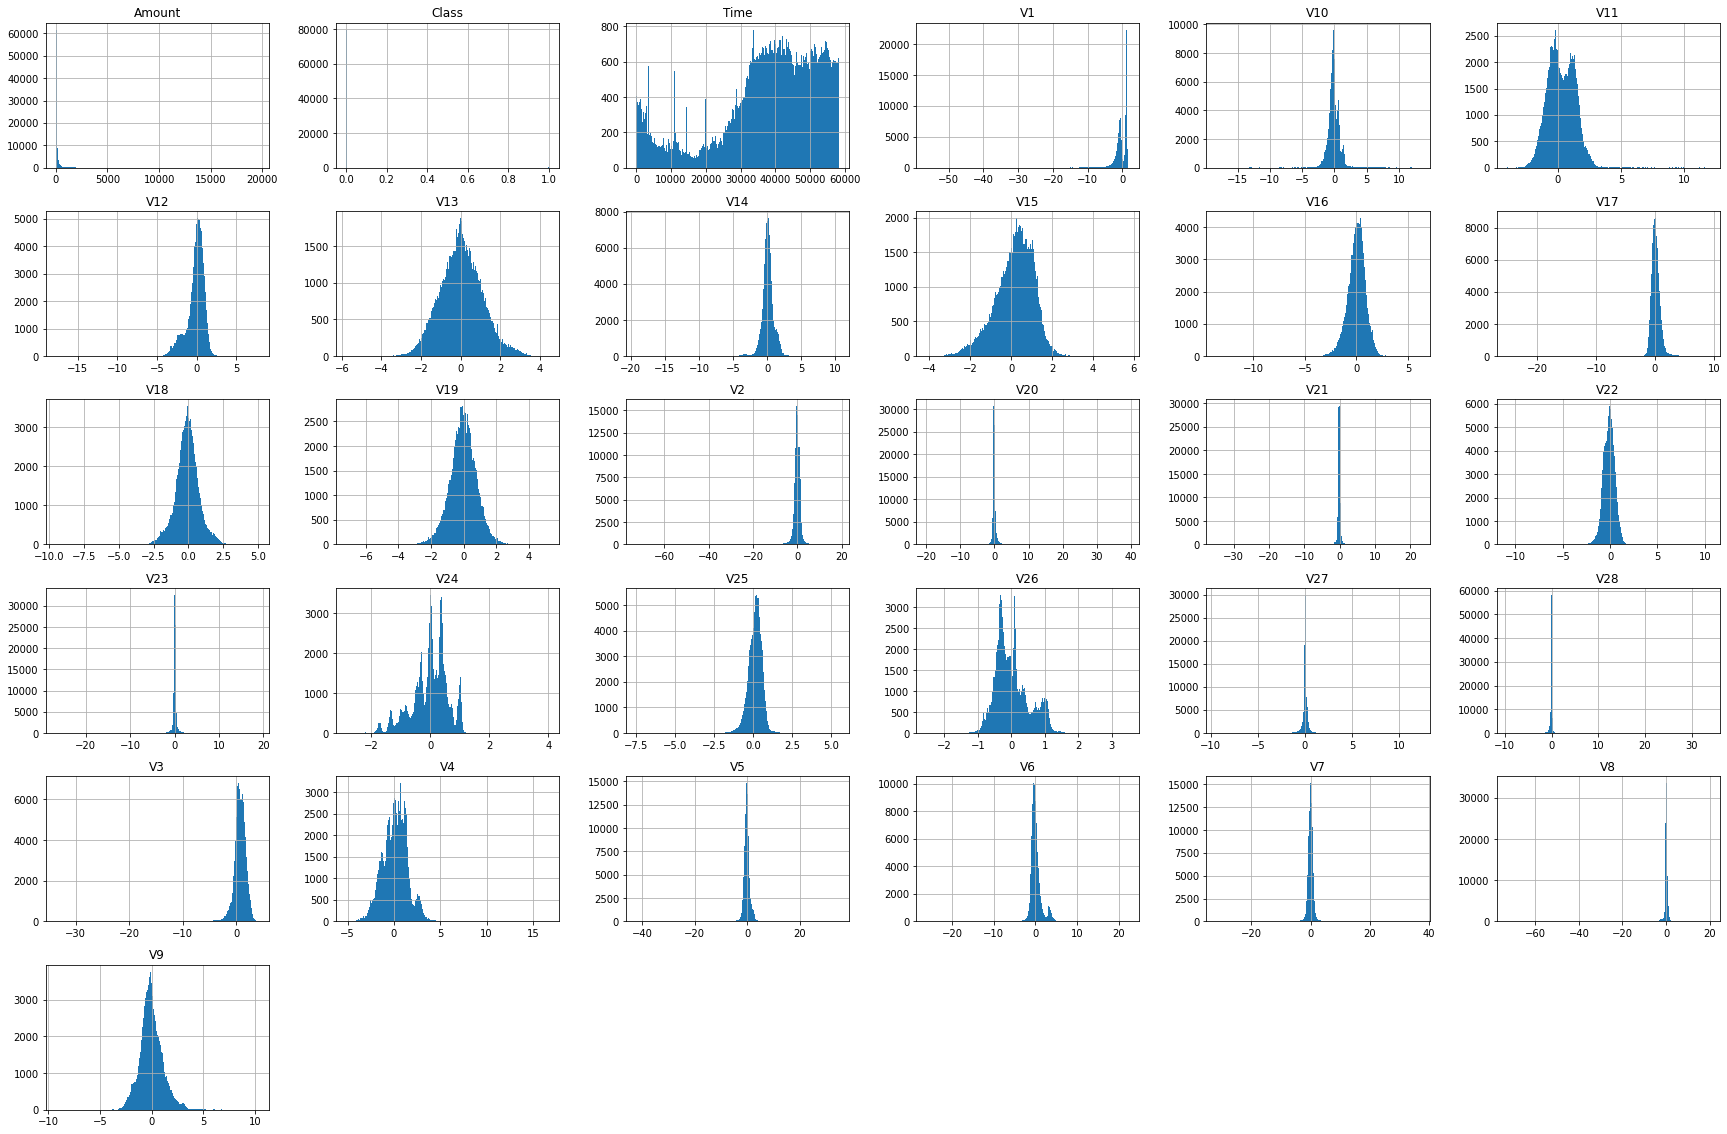

In [9]:
#построение гистограмм для оценки распределения непрерывных переменных

data.hist(figsize=(30, 20), bins=200);

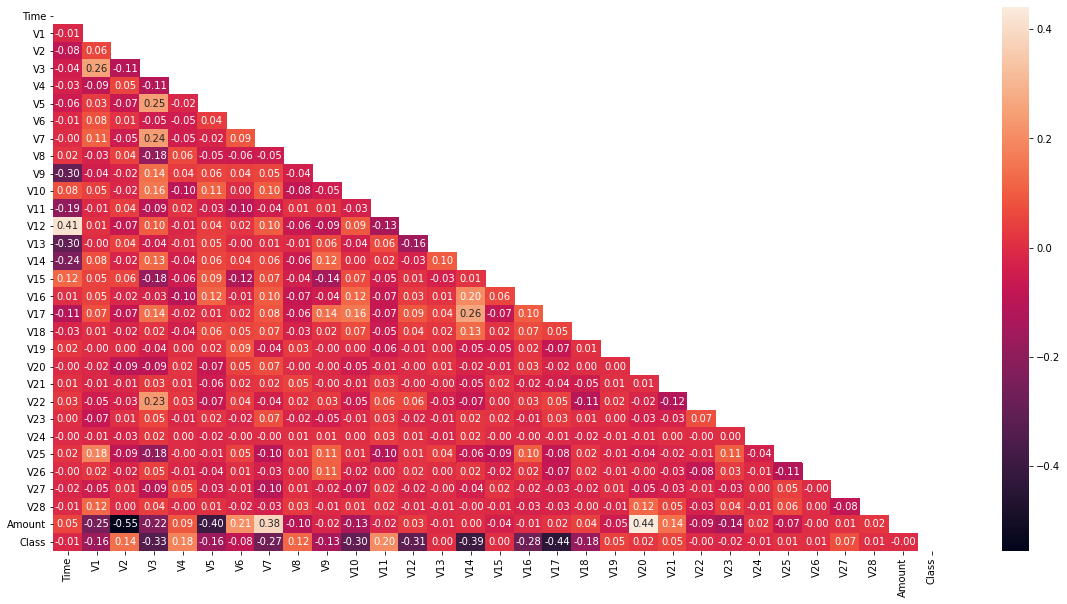

In [10]:
#построение heatmap для оценки корреляции признаков

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

plt.figure(figsize=(20,10));
sns.heatmap(lower, annot=True, fmt='.2f');

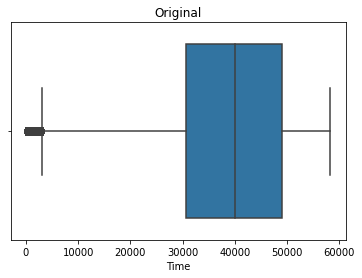

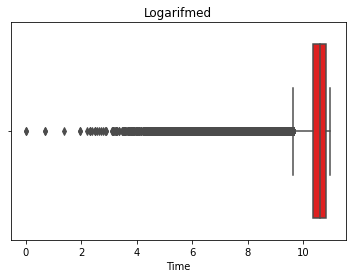

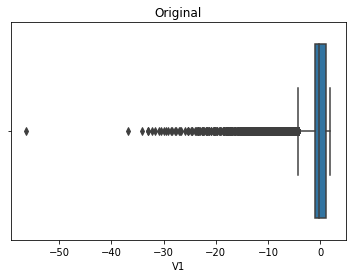

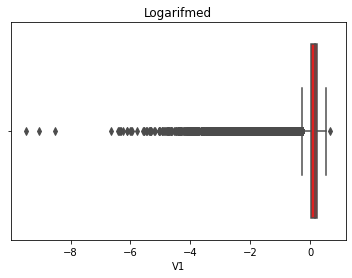

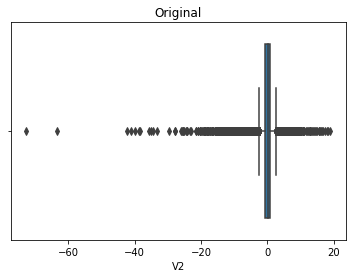

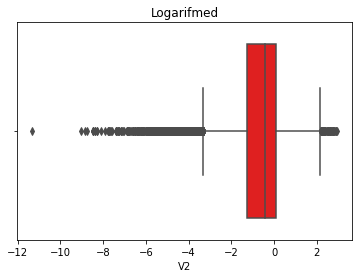

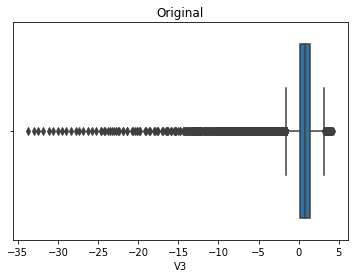

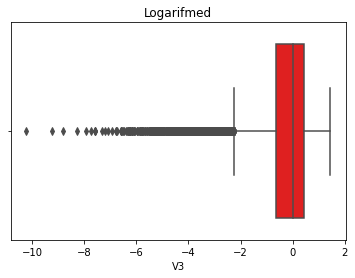

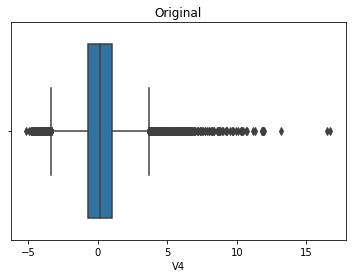

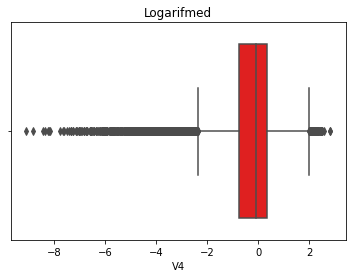

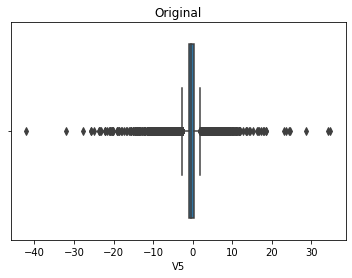

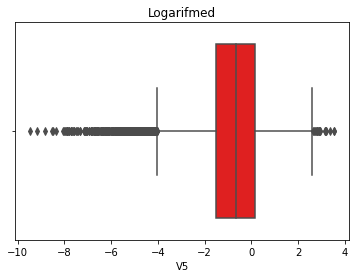

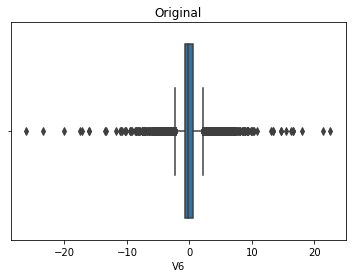

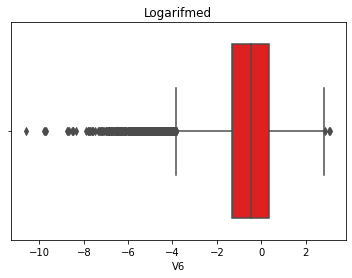

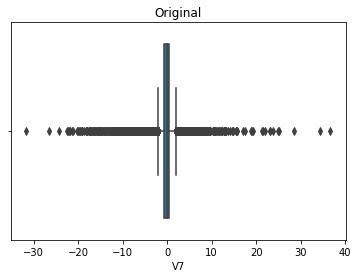

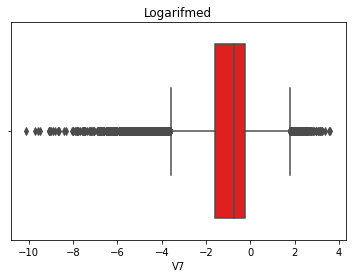

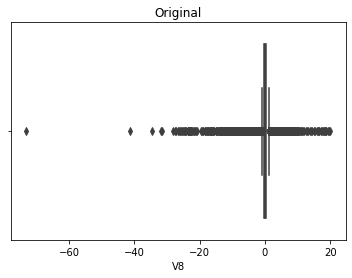

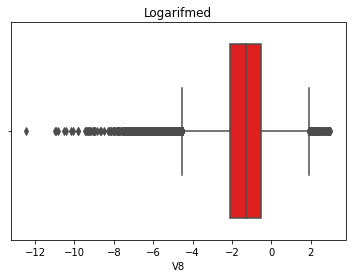

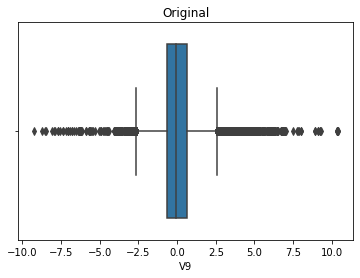

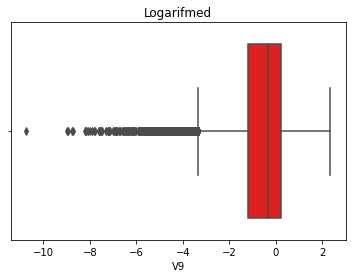

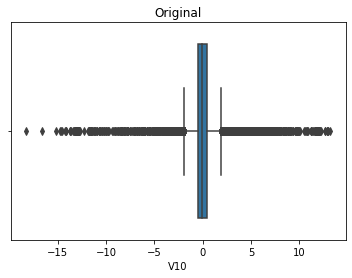

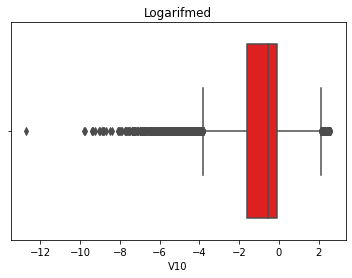

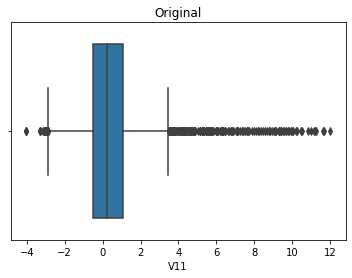

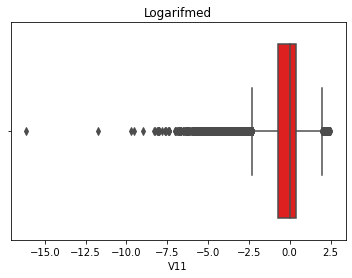

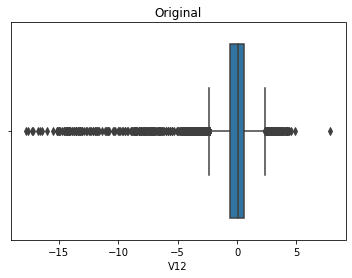

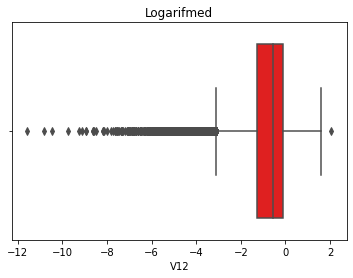

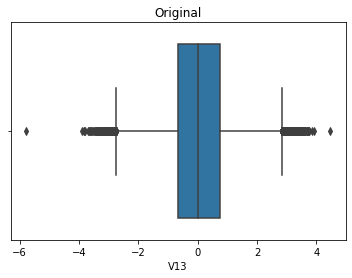

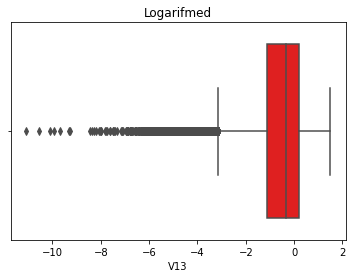

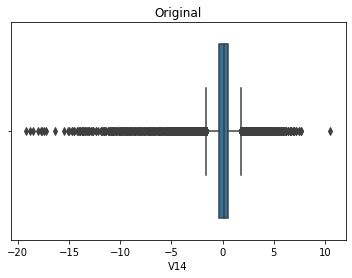

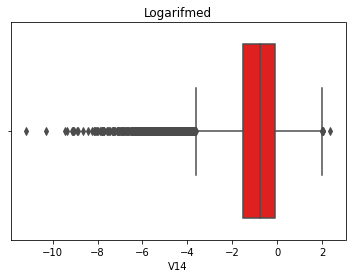

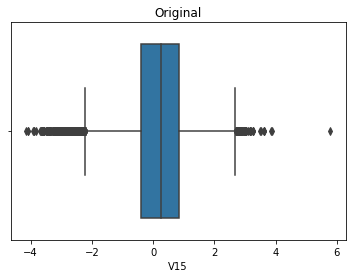

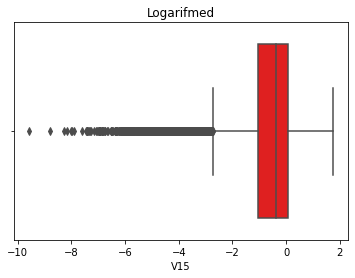

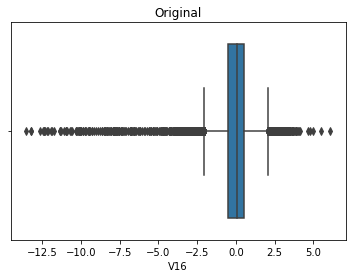

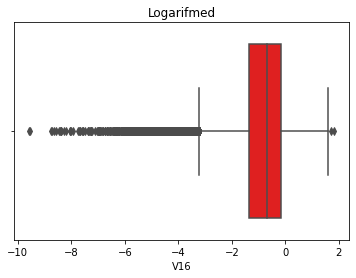

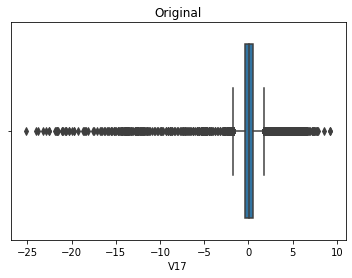

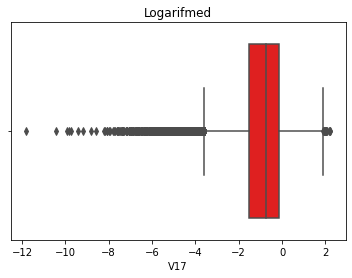

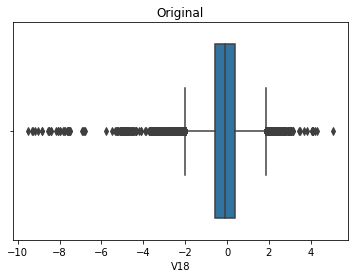

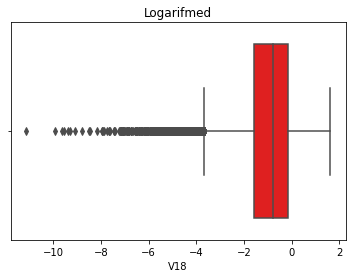

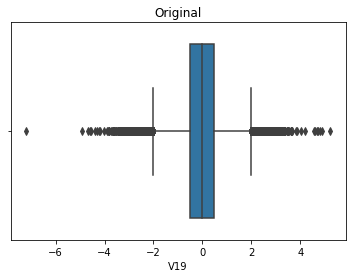

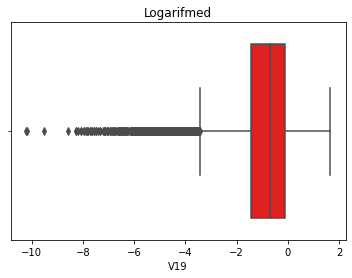

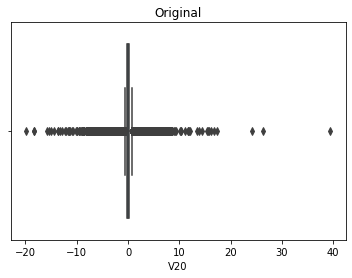

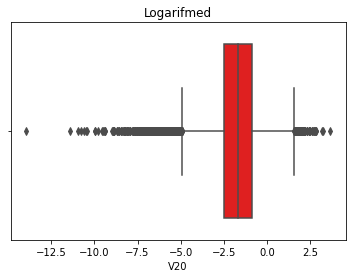

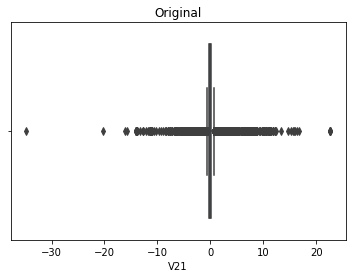

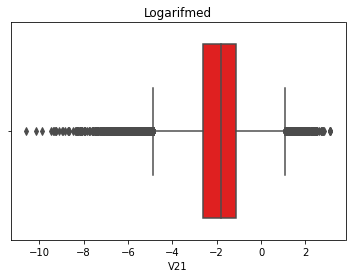

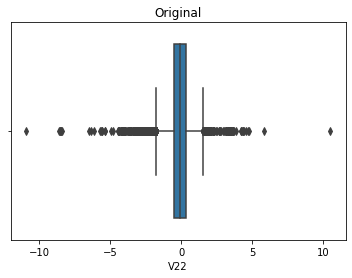

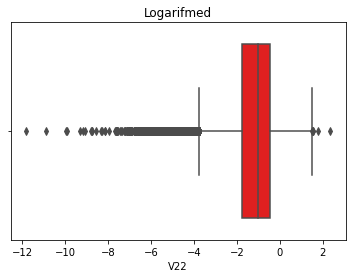

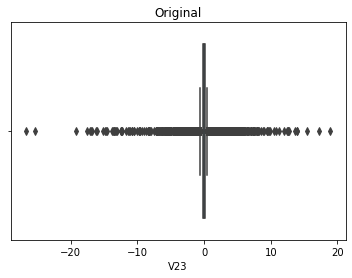

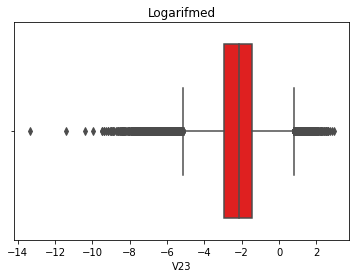

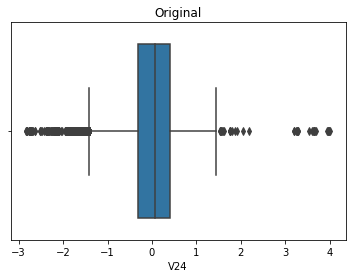

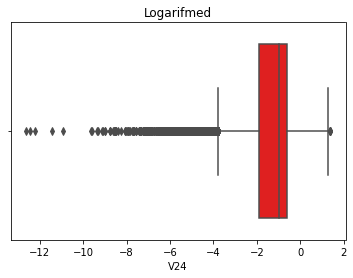

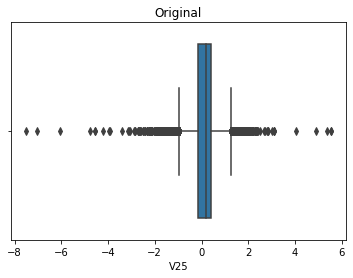

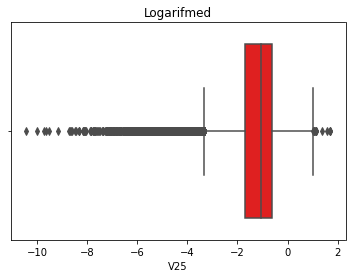

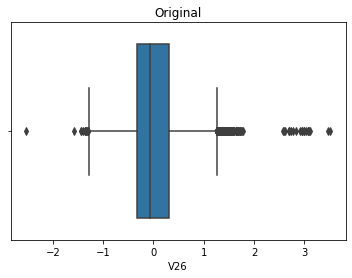

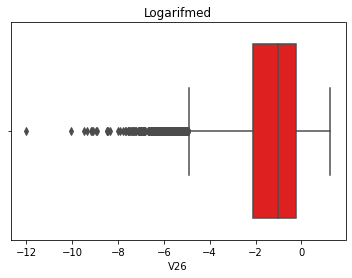

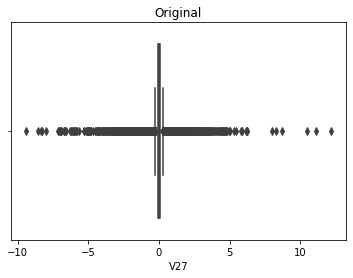

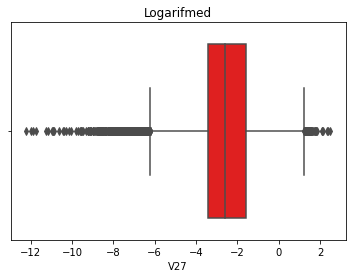

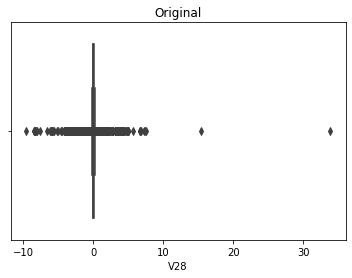

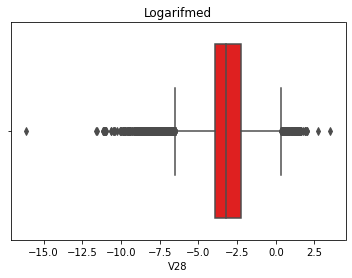

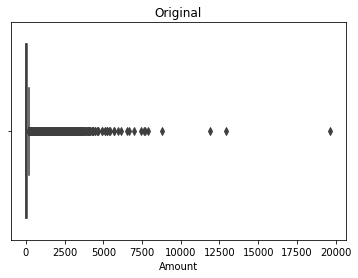

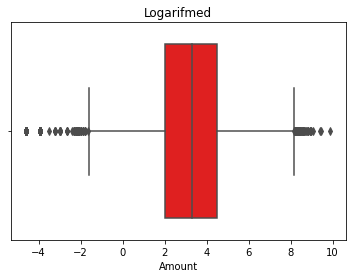

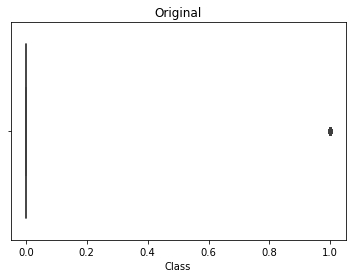

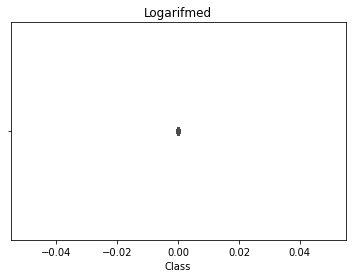

In [11]:
#построение boxplot для каждого признака для оценки распределения - исходные и логарифмированные значения

fields_list = list(data)


for i in fields_list:
    
    if data[i].dtype !='object':
        
        sns.boxplot(data=data[[i]], x = i, orient = "h").set_title("Original")
        plt.show()
        
        data_log = np.log(data[[i]])
        sns.boxplot(data = data_log, x = i, orient = "h", color = 'red').set_title("Logarifmed")
        plt.show()        

In [12]:
#процент аномалий по переменной Class

data['Class'].value_counts(normalize=True) 

0    0.99755
1    0.00245
Name: Class, dtype: float64

# Preprocessing & Feature Engineering

In [13]:
#логарифмирование непрерывных переменных

col_log = ['V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount']

for col in col_log:
    data[col + '_log'] = np.log(data[col] + 1) 
    data[col + '_log'].fillna(0, inplace=True)
    data.drop([col], axis=1, inplace=True)  

In [14]:
#стандартизация

data_sc = StandardScaler().fit_transform(data)

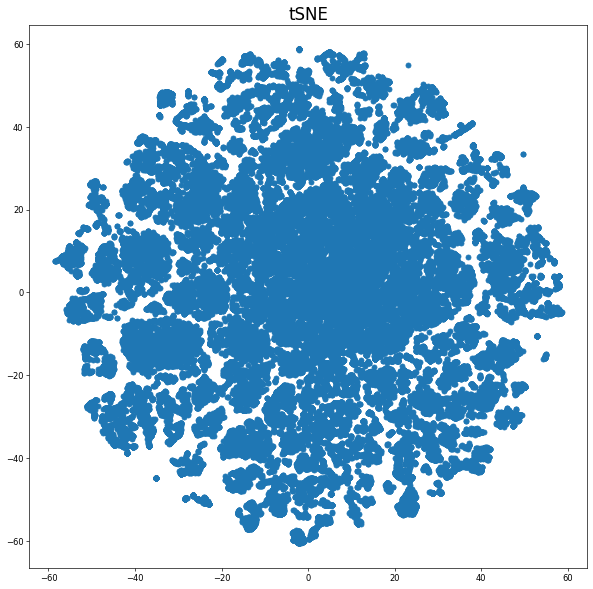

In [52]:
#визуализация исходных данных в сжатом признаковом пространстве tSNE

data_tsne = TSNE(n_components=2, random_state=42, n_jobs=-1).fit_transform(data_sc)

plt.figure(figsize=(12, 12), dpi= 60)
plt.title("tSNE", fontsize=20)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

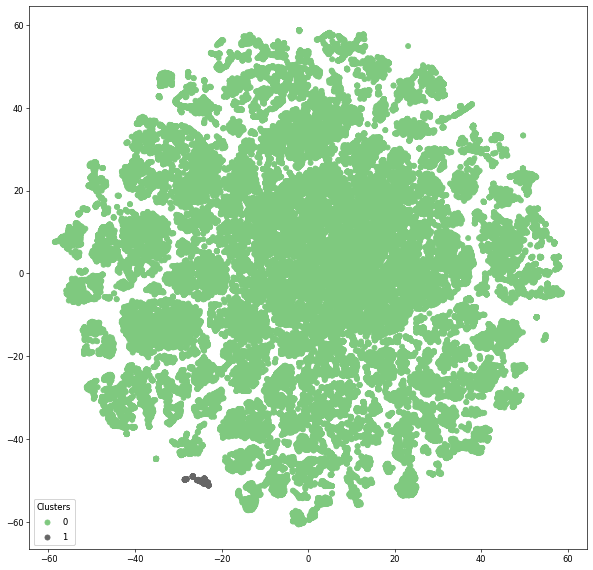

In [57]:
#визуализация аномалий, выявленных экспертной оценкой, в сжатом признаковом пространстве tSNE

fig, ax = plt.subplots(figsize=(12, 12), dpi= 60)

scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], c = data['Class'], cmap="Accent")
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend)

# Моделирование

DBSCAN

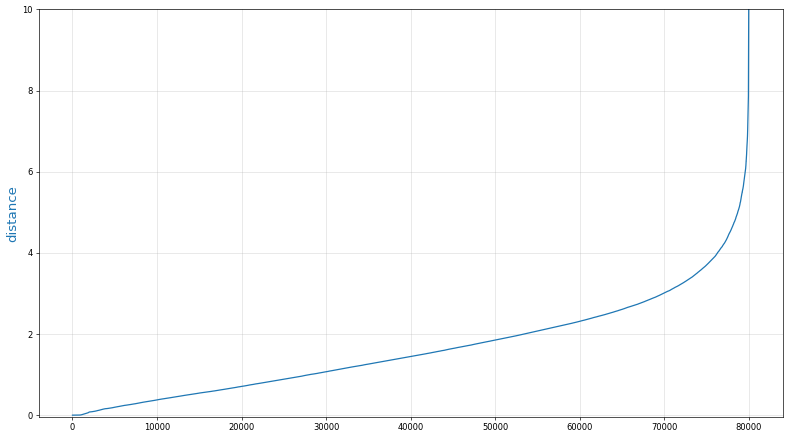

In [21]:
#нахождение оптимального значения eps с помощью NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_sc)
distances, indices = nbrs.kneighbors(data_sc)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi= 60)
ax.set_ylabel('distance', color='tab:blue', fontsize=16)
ax.grid(alpha=.4)
ax.set_ylim(ymin=-0.05, ymax=10)
plt.plot(distances)

In [29]:
#построение модели DBSCAN

db = DBSCAN(eps=4, min_samples=3)
db.fit(data_sc)

dbscan_labels = db.labels_

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Clusters total: " + str(n_clusters_dbscan))

Clusters total: 156


In [30]:
#доля аномалий в данных

dbscan_labels_n = np.array([1 if label == -1 else 0 for label in dbscan_labels])

dbscan_outlier_percentage = sum(dbscan_labels_n==1) / len(dbscan_labels_n)
dbscan_outlier_percentage

0.0521625

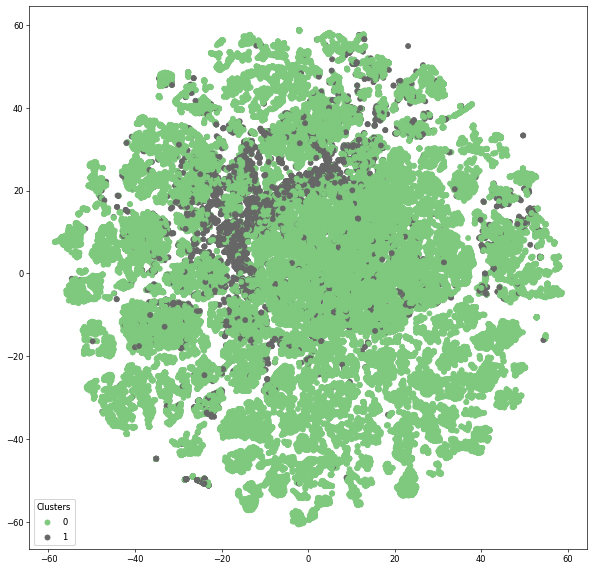

In [53]:
#визуализация аномалий, выявленных DBSCAN, в сжатом признаковом пространстве tSNE

fig, ax = plt.subplots(figsize=(12, 12), dpi= 60)

scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], c = dbscan_labels_n, cmap="Accent")
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend)

In [49]:
#оценка качества

db_report = pd.DataFrame.from_dict(classification_report(data['Class'], dbscan_labels_n, output_dict=True))
db_report

,0,1,accuracy,macro avg,weighted avg
precision,0.998668,0.022765,0.947762,0.510717,0.996277
recall,0.948900,0.484694,0.947762,0.716797,0.947762
f1-score,0.973148,0.043488,0.947762,0.508318,0.970870
support,79804.000000,196.000000,0.947762,80000.000000,80000.000000


OneClassSVM

In [33]:
#построение модели OneClassSVM

one_class_svm = OneClassSVM(nu=0.1, gamma='auto')
one_class_svm.fit(data_sc)

OneClassSVM(gamma='auto', nu=0.1)

In [34]:
#доля аномалий в данных

svm_labels = one_class_svm.predict(data_sc)
svm_labels_n = np.array([1 if label == -1 else 0 for label in svm_labels])

svm_outlier_percentage = sum(svm_labels_n==1) / len(svm_labels_n)
svm_outlier_percentage

0.099975

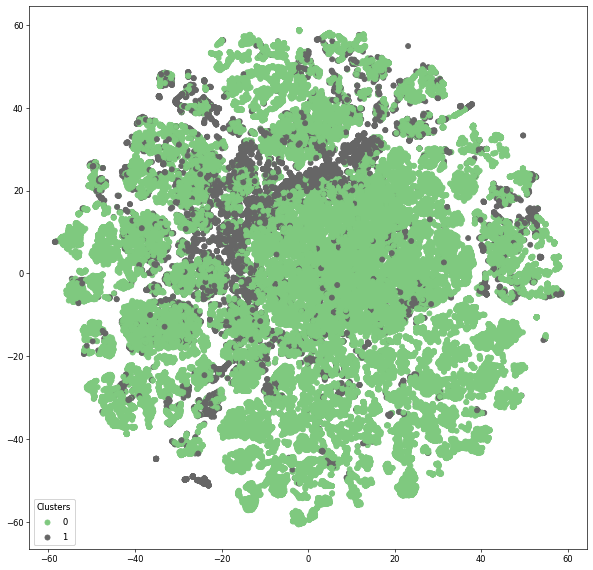

In [54]:
#визуализация аномалий, выявленных OneClassSVM, в сжатом признаковом пространстве tSNE

fig, ax = plt.subplots(figsize=(12, 12), dpi= 60)

scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], c = svm_labels_n, cmap="Accent")
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend)

In [50]:
#оценка качества

svm_report = pd.DataFrame.from_dict(classification_report(data['Class'], svm_labels_n, output_dict=True))
svm_report

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.024506,0.902475,0.512253,0.997610
recall,0.902235,1.000000,0.902475,0.951118,0.902475
f1-score,0.948605,0.047840,0.902475,0.498223,0.946399
support,79804.000000,196.000000,0.902475,80000.000000,80000.000000


Isolation Forest

In [39]:
#построение модели Isolation Forest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, max_features=1.0, bootstrap=True, behaviour="new")
isolation_forest.fit(data_sc)

IsolationForest(behaviour='new', bootstrap=True, contamination=0.1)

In [55]:
#доля аномалий в данных

isolation_labels = isolation_forest.predict(data_sc)
isolation_labels_n = np.array([1 if label == -1 else 0 for label in isolation_labels])

isolation_outlier_percentage = sum(isolation_labels_n==1) / len(isolation_labels_n)
isolation_outlier_percentage

0.1

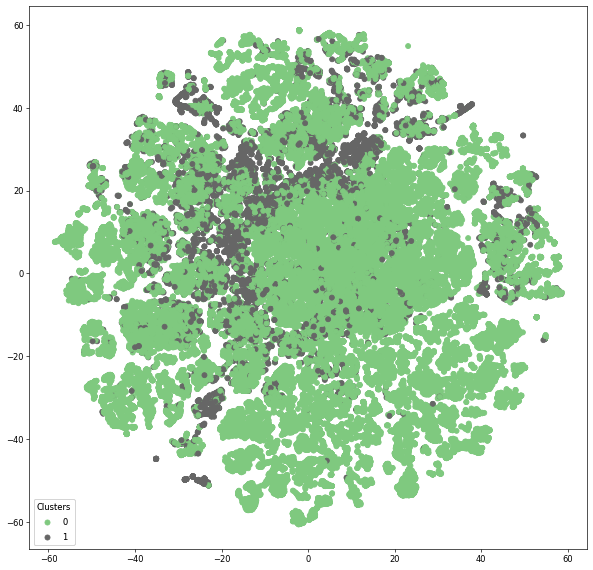

In [56]:
#визуализация аномалий, выявленных Isolation Forest, в сжатом признаковом пространстве tSNE

fig, ax = plt.subplots(figsize=(12, 12), dpi= 60)

scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], c = isolation_labels_n, cmap="Accent")
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend)

In [51]:
#оценка качества

isolation_report = pd.DataFrame.from_dict(classification_report(data['Class'], isolation_labels_n, output_dict=True))
isolation_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999806,0.022750,0.9021,0.511278,0.997412
recall,0.902035,0.928571,0.9021,0.915303,0.902100
f1-score,0.948407,0.044412,0.9021,0.496410,0.946192
support,79804.000000,196.000000,0.9021,80000.000000,80000.000000
